In [1]:
# Importing important libraries
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent = 0.8):
    df = read_csv(url, usecols = [1], engine = 'python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range = (0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting the complete dataset into training and testing
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [4]:
# Checks
print('Shape of actual data : ', data.shape)
print('Shape of training data : ', train_data.shape)
print('Shape of testing data : ', test_data.shape)

Shape of actual data :  (2820,)
Shape of training data :  (2256,)
Shape of testing data :  (564,)


In [10]:
# Reshaping the input X and target Y in proper format
def get_XY(dat, time_steps = 12):
    # Indices of the array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

trainX, trainY = get_XY(train_data)
testX, testY = get_XY(test_data)

In [11]:
# Checks
print('X_train Shape : ', trainX.shape)
print('Y_train Shape : ', trainY.shape)
print('X_test Shape : ', testX.shape)
print('Y_test Shape : ', testY.shape)

X_train Shape :  (187, 12, 1)
Y_train Shape :  (187,)
X_test Shape :  (46, 12, 1)
Y_test Shape :  (46,)


In [12]:
# Defining RNN 
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape = input_shape,
                       activation = activation[0]))
    model.add(Dense(units = dense_units, activation = activation[1]))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [15]:
# Creaing RNN Model
model = create_RNN(hidden_units = 3, dense_units = 1, 
                   input_shape = (12, 1), activation = ['tanh', 'tanh'])
model.fit(trainX, trainY, epochs = 20, batch_size = 1, verbose = 1)

Epoch 1/20
187/187 [==============================] - 1s 5ms/step - loss: 0.0255
Epoch 2/20
187/187 [==============================] - 1s 5ms/step - loss: 0.0099
Epoch 3/20
187/187 [==============================] - 1s 5ms/step - loss: 0.0071
Epoch 4/20
187/187 [==============================] - 1s 5ms/step - loss: 0.0058
Epoch 5/20
187/187 [==============================] - 1s 5ms/step - loss: 0.0051
Epoch 6/20
187/187 [==============================] - 1s 5ms/step - loss: 0.0047
Epoch 7/20
187/187 [==============================] - 1s 4ms/step - loss: 0.0043
Epoch 8/20
187/187 [==============================] - 1s 4ms/step - loss: 0.0041
Epoch 9/20
187/187 [==============================] - 1s 5ms/step - loss: 0.0039
Epoch 10/20
187/187 [==============================] - 1s 4ms/step - loss: 0.0037
Epoch 11/20
187/187 [==============================] - 1s 5ms/step - loss: 0.0036
Epoch 12/20
187/187 [==============================] - 1s 6ms/step - loss: 0.0036
Epoch 13/20
187/187 [====

In [17]:
import math

In [18]:
# Compute and print RMSE
def print_error(trainY, testY, train_predict, test_predict):
    # Error on Prediction
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Printing the train_rmse and test_rmse
    print('Train RMSE : %.3f RMSE' % (train_rmse))
    print('Test RMSE : %.3f RMSE' % (test_rmse))
    
# Making Predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

print_error(trainY, testY, train_predict, test_predict)

Train RMSE : 0.059 RMSE
Test RMSE : 0.087 RMSE


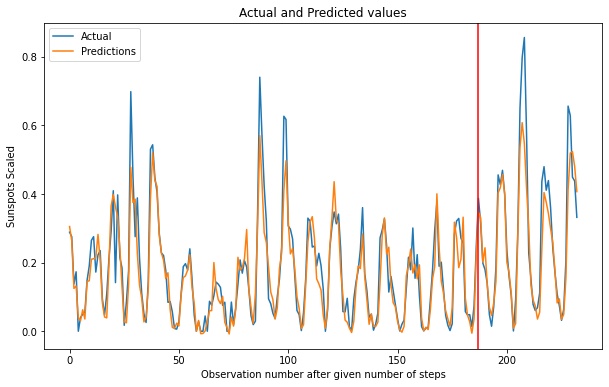

In [19]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize = (10, 6))
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x = len(trainY), color = 'r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given number of steps')
    plt.ylabel('Sunspots Scaled')
    plt.title('Actual and Predicted values')
    
plot_result(trainY, testY, train_predict, test_predict)